In [29]:
# import library pandas
import pandas as pd
# call the standfordsentimenttreesbank
data1= pd.read_csv('datasetSentences.txt',sep ='\t', header=None) 
data3= pd.read_csv('datasetSplit.txt',sep =',', header=None)
#delete column 1 in every column data
data2 = data1.drop(0,1)
data4 = data3.drop(0,1)
#change column name in every column
data2.columns =['sentences']
data4.columns =['datasplit']
#delete first raw in every column
data2_drop = data2.drop(data2.index[0])
data4_drop = data4.drop(data4.index[0])
#merge all columns
data2['datasetsplit'] = data4_drop
data2_drop= data2.drop(data2.index[0])
#initialize data2_drop to data
data = data2_drop
#print data 
data

,sentences,datasetsplit
1,The Rock is destined to be the 21st Century 's...,1
2,The gorgeously elaborate continuation of `` Th...,1
3,Effective but too-tepid biopic,2
4,If you sometimes like to go to the movies to h...,2
5,"Emerges as something rare , an issue movie tha...",2
...,...,...
11851,A real snooze .,1
11852,No surprises .,1
11853,We 've seen the hippie-turned-yuppie plot befo...,1
11854,Her fans walked out muttering words like `` ho...,1


In [30]:
# split data and train,test data
from sklearn.model_selection import train_test_split
sentences = data['sentences']
y = data.datasetsplit
sentences_train,sentences_test,y_train,y_test=train_test_split(sentences,y,test_size=0.33)


In [31]:
# extraction data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


In [35]:
#build 
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,epochs=5,verbose=False,validation_data=(X_test, y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

print(history.history.keys())
print("Training Accuracy: {:.4f}".format(accuracy*100))
print("Testing Accuracy:  {:.4f}".format(accuracy*100))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                148380    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 148,391
Trainable params: 148,391
Non-trainable params: 0
_________________________________________________________________
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
Training Accuracy: 72.5786
Testing Accuracy:  72.5786


In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

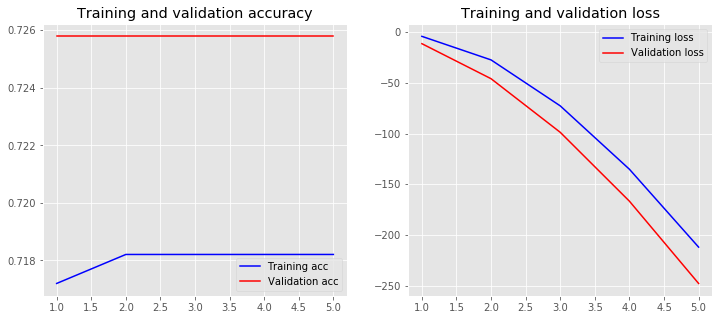

In [37]:
plot_history(history)

In [ ]:
#do epoch under 20 because we avoid overfitting